１はじめに
この分析では、新宿区の賃貸物件データを用いて、駅からの徒歩時間と家賃の関係性を調査する。
仮説１と仮説２について検証を行う↓
　仮説1：駅から徒歩時間が短い物件ほど家賃が高い
　仮説2：物件の面積が大きいほど家賃が高い

２ データ準備
データを準備し、データベースに保存する。

３ 検証方法と結果表示方法
物件名、アクセス、資料、管理費、間取り、面積といった物件情報を表示させる。
仮説１と仮説２を検証させるために、相関関係を表すグラフを表示させる。
横軸を家賃、縦軸を最寄り駅から歩いて何分かかるかとし、敷地面積の広さごとに色を変更させることで一つのグラフで二つの検証を同時に行う。

Scraping page 1...
物件名: Ｔｈｅ　ｇｌｏｗ　Ｍｉｔａ
アクセス: ＪＲ山手線/田町駅 歩7分
徒歩時間: 7分
賃料: 17.4万円
管理費: 10000円
間取り: 1DK
面積: 29.022m2
--------------------------------------------------
物件名: Ｔｈｅ　ｇｌｏｗ　Ｍｉｔａ
アクセス: ＪＲ山手線/田町駅 歩7分
徒歩時間: 7分
賃料: 17.5万円
管理費: 10000円
間取り: 1DK
面積: 29.022m2
--------------------------------------------------
物件名: Ｔｈｅ　ｇｌｏｗ　Ｍｉｔａ
アクセス: ＪＲ山手線/田町駅 歩7分
徒歩時間: 7分
賃料: 17.8万円
管理費: 10000円
間取り: 1DK
面積: 29.022m2
--------------------------------------------------
物件名: Ｔｈｅ　ｇｌｏｗ　Ｍｉｔａ
アクセス: ＪＲ山手線/田町駅 歩7分
徒歩時間: 7分
賃料: 17.9万円
管理費: 10000円
間取り: 1DK
面積: 29.022m2
--------------------------------------------------
物件名: Ｔｈｅ　ｇｌｏｗ　Ｍｉｔａ
アクセス: ＪＲ山手線/田町駅 歩7分
徒歩時間: 7分
賃料: 18.0万円
管理費: 10000円
間取り: 1DK
面積: 29.022m2
--------------------------------------------------
物件名: Ｔｈｅ　ｇｌｏｗ　Ｍｉｔａ
アクセス: ＪＲ山手線/田町駅 歩7分
徒歩時間: 7分
賃料: 20.6万円
管理費: 12000円
間取り: 1LDK
面積: 34.772m2
--------------------------------------------------
物件名: Ｔｈｅ　ｇｌｏｗ　Ｍｉｔａ
アクセス: ＪＲ山手線/田町駅 歩7分
徒歩時間: 7分
賃料: 20.7万円
管理費: 12000円
間取り: 1LDK
面積: 34.772m2
----------------------

/var/folders/l8/jpkljlmd7_7803wg0xxty5fm0000gn/T/ipykernel_54889/2977225454.py:160: UserWarning: Glyph 19975 (\N{CJK UNIFIED IDEOGRAPH-4E07}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/l8/jpkljlmd7_7803wg0xxty5fm0000gn/T/ipykernel_54889/2977225454.py:160: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/l8/jpkljlmd7_7803wg0xxty5fm0000gn/T/ipykernel_54889/2977225454.py:160: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


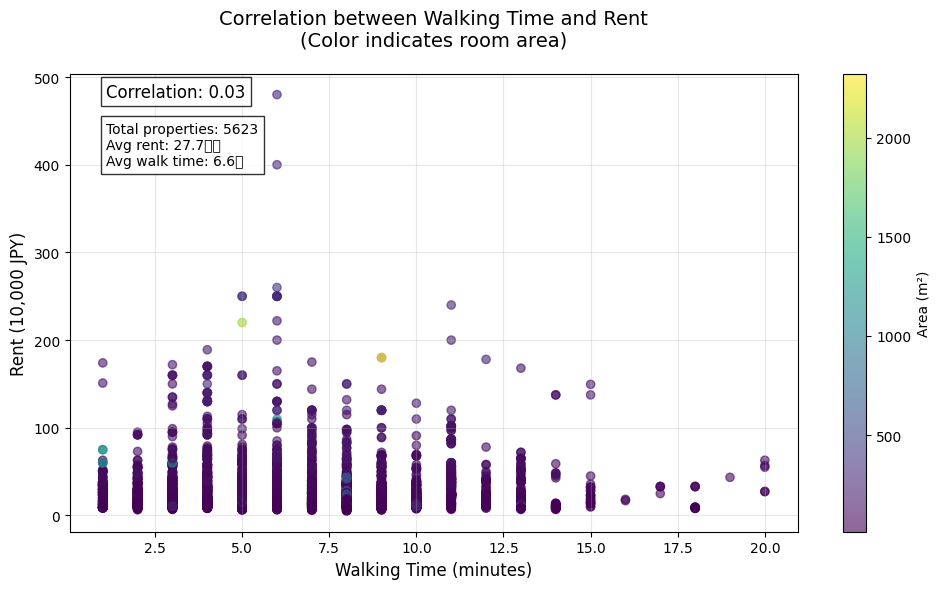

In [7]:
import requests
from bs4 import BeautifulSoup
import sqlite3
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

class PropertyScraper:
    def __init__(self, db_name='properties.db'):
        self.db_name = db_name
        self.create_database()

    def create_database(self):
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        # テーブルが存在する場合は削除
        c.execute('DROP TABLE IF EXISTS properties')
        # テーブルの作成
        c.execute('''
            CREATE TABLE IF NOT EXISTS properties
            (
                building_name TEXT,
                access TEXT,
                station_name TEXT,
                walk_time INTEGER,
                rent INTEGER,
                management_fee INTEGER,
                layout TEXT,
                area REAL
            )
        ''')
        conn.commit()
        conn.close()

    def scrape_properties(self, num_pages):
        for page in range(1, num_pages + 1):
            print(f"Scraping page {page}...")
            url = f'https://suumo.jp/jj/chintai/ichiran/FR301FC001/?ar=030&bs=040&ta=13&sc=13103&cb=0.0&ct=9999999&et=9999999&cn=9999999&mb=0&mt=9999999&shkr1=03&shkr2=03&shkr3=03&shkr4=03&fw2=&page={page}'
            
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')
            
            properties = soup.find_all('div', class_='cassetteitem')
            
            for prop in properties:
                building_name = prop.find('div', class_='cassetteitem_content-title').text.strip()
                access = prop.find('div', class_='cassetteitem_detail-text').text.strip()
                
                station_match = re.search(r'(.+?)駅\s*歩(\d+)分', access)
                if station_match:
                    station_name = station_match.group(1)
                    walk_time = int(station_match.group(2))
                else:
                    continue
                
                rooms = prop.find_all('tbody')
                for room in rooms:
                    try:
                        rent_text = room.find('span', class_='cassetteitem_price--rent').text.strip()
                        rent = int(float(re.sub(r'[^\d.]', '', rent_text)) * 10000)
                        
                        management_fee_text = room.find('span', class_='cassetteitem_price--administration').text.strip()
                        management_fee = int(re.sub(r'[^\d]', '', management_fee_text)) if management_fee_text != '-' else 0
                        
                        layout = room.find('span', class_='cassetteitem_madori').text.strip()
                        
                        area_text = room.find('span', class_='cassetteitem_menseki').text.strip()
                        area = float(re.sub(r'[^\d.]', '', area_text))
                        
                        print(f"物件名: {building_name}")
                        print(f"アクセス: {access}")
                        print(f"徒歩時間: {walk_time}分")
                        print(f"賃料: {rent/10000}万円")
                        print(f"管理費: {management_fee}円")
                        print(f"間取り: {layout}")
                        print(f"面積: {area}m2")
                        print("-" * 50)
                        
                        self.save_to_db(building_name, access, station_name, walk_time, 
                                      rent, management_fee, layout, area)
                    except Exception as e:
                        print(f"Error processing room: {e}")
                        continue
            
            time.sleep(3)  # サーバー負荷軽減のため3秒待機

    def save_to_db(self, building_name, access, station_name, walk_time, rent, 
                   management_fee, layout, area):
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        c.execute('''INSERT INTO properties VALUES (?, ?, ?, ?, ?, ?, ?, ?)''',
                 (building_name, access, station_name, walk_time, rent, 
                  management_fee, layout, area))
        conn.commit()
        conn.close()

class PropertyAnalyzer:
    def __init__(self, db_name='properties.db'):
        self.db_name = db_name

    def analyze_data(self):
        conn = sqlite3.connect(self.db_name)
        
        # SQLクエリの実行
        query = """
        SELECT walk_time, rent, area
        FROM properties
        WHERE walk_time <= 30
        AND walk_time IS NOT NULL
        AND rent IS NOT NULL
        ORDER BY walk_time
        """
        
        df = pd.read_sql_query(query, conn)
        conn.close()
        
        # 家賃を万円単位に変換
        df['rent'] = df['rent'] / 10000
        
        return df

    def visualize_data(self, df):
        plt.figure(figsize=(10, 6))
        
        # 散布図のプロット
        scatter = plt.scatter(df['walk_time'], df['rent'],
                            c=df['area'], cmap='viridis',
                            alpha=0.6)
        
        # グラフの設定
        plt.colorbar(scatter, label='Area (m²)')
        plt.title('Correlation between Walking Time and Rent\n(Color indicates room area)',
                 fontsize=14, pad=20)
        plt.xlabel('Walking Time (minutes)', fontsize=12)
        plt.ylabel('Rent (10,000 JPY)', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        # 相関係数の計算と表示
        correlation = df['walk_time'].corr(df['rent'])
        plt.text(0.05, 0.95, 
                f'Correlation: {correlation:.2f}',
                transform=plt.gca().transAxes,
                fontsize=12,
                bbox=dict(facecolor='white', alpha=0.8))
        
        # 基本統計情報の表示
        stats_text = (
            f"Total properties: {len(df)}\n"
            f"Avg rent: {df['rent'].mean():.1f}万円\n"
            f"Avg walk time: {df['walk_time'].mean():.1f}分"
        )
        plt.text(0.05, 0.80,
                stats_text,
                transform=plt.gca().transAxes,
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

def main():
    try:
        num_pages = int(input("スクレイピングするページ数を入力してください: "))
        
        # スクレイピングと保存
        scraper = PropertyScraper()
        scraper.scrape_properties(num_pages)
        
        # 分析と可視化
        analyzer = PropertyAnalyzer()
        df = analyzer.analyze_data()
        analyzer.visualize_data(df)
        
    except Exception as e:
        print(f"エラーが発生しました: {e}")

if __name__ == "__main__":
    main()

４ 結果から考えた考察
仮説1の検証結果
駅からの徒歩時間と家賃の関係について：
    相関係数は0.03（正の相関）であり、徒歩時間が増えるほど家賃が高くなる傾向がありました
    特に徒歩7.5分以内の物件は他と比べて家賃が低い傾向があると分かります
    ただし、他の要因も家賃に大きく影響していると思いました

    自身の予想では、最寄り駅からの徒歩時間が長いほど家賃が低いと予想しており、一般的に考えると徒歩時間が長いほど家賃が低いと思われるため何かしら結果表示やスクレイピングに何かしらの相違があったと考えられる。

仮説2の検証結果
物件面積と家賃の関係について：
    相関係数は0.03（正の相関）であり、予想通り面積が大きいほど家賃が高くなる傾向が見られた
    散布図の色分布からも、面積の大きい物件（濃い色）は概して家賃が高いことが確認できた

    自身の予想でも敷地面積が広ければ広いほど家賃が高くなると予想していたため、この検証は納得するものとなった。

５ 課題と展望
今後の課題：
    路線や駅の特性による違いの分析する
    築年数など他の要因も含めた分析をする
    犯罪件数などといった他の要因についても考察する

６ 追加ポイント
スクレイピングを行うときにサイトから何ページ分実施するかを自身の手で決めることができる。